# CAP4630 | Dr. Oge Marques | Project 2
## Adriel Abad, Mateo Gomez, Alicia Van
### October 1, 2023

Genetic Algorithm For Traveling Salesmen Problem

Parameters For Genetic Algorithm:

Please enter an integer number of cities in the Traveling Salesmen Problem (Default is 25): 6

Number of cities for Traveling Salesman Problem must be at least 25, would you like to set the it to the default 25 (y/n)? y
Please enter integer number for desired Population Size: 2000
Please enter a float Mutation Rate: 0.3
Please enter an integer number for the total number of Generations to be created: 6
Please enter an integer number for the Elitism Size that will dictate how many individuals are copied in each new generation: 5
Would you like to use stagnation as a stopping method (y/n)? n


Generation 1: Route 1975: 2037.01 units
Best Solution: Generation 6: Route 1: 1757.89 units

1. (165,139)
2. (191,120)
3. (180,114)
4. (197,57)
5. (183,20)
6. (4,81)
7. (61,147)
8. (24,178)
9. (23,195)
10. (39,117)
11. (25,92)
12. (25,50)
13. (4,164)
14. (5,185)
15. (68,169)
16. (63,61)
17. (95,142)
18. (115,154)
1

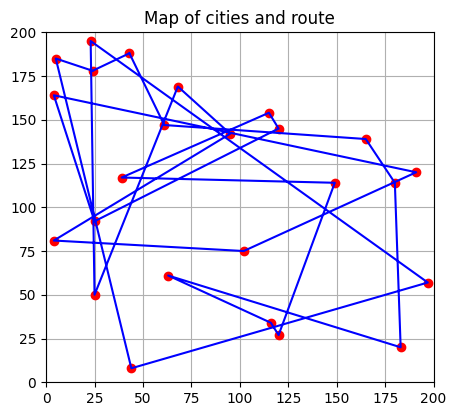

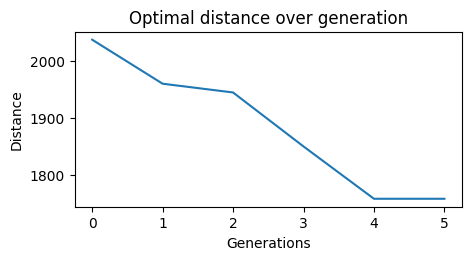

In [ ]:
# Travelling Salesmen Problem using a Genetic Algorithm
# Group members: Adriel Marie Abad, Alicia Van, Mateo Gomez


import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import operator
import math

class City:
    # Create a city with an X and Y coordinate
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # Calculate the distance between self and city
    # Thanks to Eric Stoltz and Lee Jacobson
    def distance(self, city):
        xdis = abs(self.x - city.x)
        ydis = abs(self.y - city.y)
        distance = np.sqrt((xdis ** 2) + (ydis ** 2))
        return distance

    # Returns a string representation of the city as coordinates
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

# Thanks to Eric Stoltz and Lee Jacobson
# A route is an order of the cities to visit
class Routes:
    # Initialize the route's order, distance and fitness
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0
    # Calculate the route distance given a list of the order of cities
    def rDistance(self):
        if self.distance == 0:
            pathDist = 0
            # Loop through the cities
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                endCity = None
                # If last city, go back to starting city
                if i + 1 < len(self.route):
                    endCity = self.route[i+1]
                else:
                    endCity = self.route[0]
                # Calculate distance between two cities
                pathDist += fromCity.distance(endCity)
            self.distance = pathDist

        return self.distance
    # Fitness is the inverse of the distance; the less distance, the more fitness
    def rFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.rDistance())
        return self.fitness

# Randomly generates a list of the order of cities, the route
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

# Generates the initial population of routes as a list
def initPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

# Sorts the population by fitness level
def sortFitness(population):
    # Dictionary of fitness parallel to the population list
    fitnessResults = {}
    # Iterate through the population, calculating each route's fitness
    for i in range(0, len(population)):
        r = Routes(population[i])
        fitnessResults[i] = r.rFitness()
    # Returns tuples of the route ID and its fitness
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

# Turns fitness into a probability — more fitness, more probability
def normalizeFitness(fitnessResults):
    # Converts tuples to lists
    fitnessList = []
    for i in range(0, len(fitnessResults)):
        l = list(fitnessResults[i])
        fitnessList.append(l)
    # Begins normalizing the values
    sum = 0
    for i, item in enumerate(fitnessList):
        sum += item[1]
    for i, item in enumerate(fitnessList):
        item[1] = item[1] / sum
    return fitnessList

# Thanks to The Coding Train and Eric Stoltz
# Creates the new generation
def nextGeneration(population, fitness, mutationRate, elitismSize):
    # Stores the route IDs with best fitness
    route_num = []
    for i in range(elitismSize):
      route_num.append(fitness[i][0])
    # Make a list that stores the best routes
    best = []
    for id in route_num:
      best.append(population[id])
    #print(f'Elites: {best}')
    #print(f'Best route: {best}')

    # Create a list for children and append it with previous population
    newPopulation = []
    for i in range(len(population)):
      newPopulation.append(population[i])

    # Makes a list of fitness values
    fitness_val = []
    for i in range(len(fitness)):
        fitness_val.append(fitness[i][1])

    # Select the mating pool
    parents = selection(population, fitness_val)
    # Breed to make children
    children = breed(parents, best, elitismSize)

    # Appends children to the new population after possibility of mutation
    for j in range(len(population)):
      # Prevents elites from being mutated
      if (j > elitismSize):
        children[j] = mutate(children[j], mutationRate)
      newPopulation[j] = children[j]
    return newPopulation

# Selects parents to be made based on fitness proportionate selection
# Code thanks to the Coding Train
def selection(pop, prob):
    # Makes a list of parents, the mating pool
    parents = []

    # Randomly selects parents based on their probability
    for i in range(len(pop)):
      # Generate a random value
      r = random.random()
      i = 0
      # Keep subtracting the probability of r until it's negeative
      while (r > 0):
          r = r - prob[i]
          i = i+1
      # Pick the index of the probability value before it went negative
      i = i-1
      # Adds the individual to the mating pool
      parents.append(pop[i])
    return parents

def breed(parents, elites, eliteSize):
  # Create list of children
  children = []
  # Length without elite size
  l = len(parents) - eliteSize
  # Create a random sample of the pool
  pool = random.sample(parents, len(parents))

  # Copy duplicates of elite
  for i in range(0, eliteSize):
    children.append(elites[i])

  for i in range(0, l):
    child = crossover(pool[i], pool[len([parents])-i-1])
    children.append(child)

  #print(f'After: {children}')
  return children

# Combine the genes of two parents
def crossover(p1, p2):
  # Create arrays for the genes
  child = []
  childP1 = []
  childP2 = []

  # Create a gene from parent 1 and parent 2
  geneA = int(random.random() * len(p1))
  geneB = int(random.random() * len(p2))

  # Find a range for the crossover
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)

  # Append genes to child, crossover
  for i in range(startGene, endGene):
    childP1.append(p1[i])

  # Ensure that no duplicate cities are being added
  childP2 = [item for item in p2 if item not in childP1]

  # Put the two genes together
  child = childP1 + childP2

  return child

# Randomly select indices and swap their values
# Reference: https://stackoverflow.com/questions/47724017/swap-two-values-randomly-in-list

# Thanks to Eric Stoltz for idea of using mutation rate
# Randomly swaps order of cities
def mutate(children, mutationRate):
    # If randomized number hits mutation rate threshold
    if (random.random() < mutationRate):
      idx = range(len(children))
      i1, i2 = random.sample(idx, 2)
      children[i1], children[i2] = children[i2], children[i1]
    return children

def GA(population, popSize, cityList, mutationRate, generations, elitismSize):
    z = 1
    # Stores the most optimal distance of each generation
    distlist = []
    # Initially sorts and normalizes the initial population
    sFitness = sortFitness(population)
    nFitness = normalizeFitness(sFitness)
    # Takes the ID of fittest route and appends its distance to a list of best route distances of each generation
    route_num = sFitness[0][0]
    r = Routes(population[route_num])
    distlist.append(r.rDistance())
    print(f'Generation 1: Route {route_num+1}: {round(r.rDistance(),2)} units')

    # Iterates through new generations
    for i in range(1, generations):
        # Creates the new generation
        population = nextGeneration(population, nFitness, mutationRate, elitismSize)
        # Sorts and normalizes fitness
        sFitness = sortFitness(population)
        nFitness = normalizeFitness(sFitness)
        # Returns the most optimal route in the generation
        route_num = sFitness[0][0]
        r = Routes(population[route_num])
        distlist.append(r.rDistance())
        # Prints the most optimal route every X generations
        if (i%100==0):
          print(f'Generation {i}: Route {route_num+1}: {round(r.rDistance(), 2)} units')
    print(f'Best Solution: Generation {generations}: Route {route_num+1}: {round(r.rDistance(),2)} units\n')
    for route in r.route:
        print(f"{z}. {route}")
        z += 1

    # Plots the graph with the route with best fitness
    plotCity(cityList, sFitness)
    return distlist

# Genetic algorithm using stagnation
def GAS(population, popSize, cityList, mutationRate, generations, elitismSize, stag):
    z = 1
    # Stores the most optimal distance of each generation
    distlist = []
    # Initially sorts and normalizes the initial population
    sFitness = sortFitness(population)
    nFitness = normalizeFitness(sFitness)
    # Takes the ID of fittest route and appends its distance to a list of best route distances of each generation
    route_num = sFitness[0][0]
    r = Routes(population[route_num])
    distlist.append(r.rDistance())
    print(f'Generation 1: Route {route_num+1}: {round(r.rDistance(),2)} units')

    # Iterates through new generations
    for i in range(1, generations):
        # Creates the new generation
        population = nextGeneration(population, nFitness, mutationRate, elitismSize)
        # Sorts and normalizes fitness
        sFitness = sortFitness(population)
        nFitness = normalizeFitness(sFitness)
        # Returns the most optimal route in the generation
        route_num = sFitness[0][0]
        r = Routes(population[route_num])
        distlist.append(round(r.rDistance(), 8))
        # Number of generations of same result to check for stagnation
        count = 0
        stag1 = stag
        if i >= stag1:
          temp = distlist[i - stag1]
          while stag1 != 0:
            stag1 -= 1
            if distlist[i - stag1] == temp:
              temp = distlist[i - stag1]
            else:
               count += 1
          if count == 0:
            print(f"\n\nPopulation has reached a state of Stagnation, Terminating.....")
            print(f'\nBest Solution: Generation {i}: Route {route_num+1}: {round(r.rDistance(), 2)} units')
            print(f'\nThe most optimal path is: ')
            for route in r.route:
              print(f"{z}. {route}")
              z += 1
            break
        # Prints the most optimal route every X generations
        if (i%100==0):
          print(f'Generation {i}: Route {route_num+1}: {round(r.rDistance(), 2)} units')
    if count != 0:
      print(f'\nBest Solution: Generation {generations}: Route {route_num+1}: {round(r.rDistance(),2)} units')
      for route in r.route:
        print(f"{z}. {route}")
        z += 1
    i += 1
    # Plots the graph with the route with best fitness
    plotCity(cityList, sFitness)
    plotDistance(distlist, i)
    return distlist

# Creates the graph with the cities
def plotCity(cityList, sFitness):
    # Creates a list of x and y values
    x = []
    y = []
    # A list of the starting and ending x and y points to return to beginning city
    ret_x = []
    ret_y = []
    # Takes in the route from the sorted route list
    route_num = sFitness[0][0] # Finds the ID of the route with the highest fitness
    r = population[route_num]
    # Takes the x and y values of the cities of that route
    for i in range(len(population[route_num])):
        x.append(population[route_num][i].x)
        y.append(population[route_num][i].y)
        #print(f'City {i+1}: {population[route_num][i]}')

        # Labels the city number based on order of the route
        str_city = str(i+1)
        #plt.text(population[route_num][i].x, population[route_num][i].y, str_city)
    # Makes a list of the starting city and ending city coordinates to loop back to beginning
    ret_x.append(x[0])
    ret_x.append(x[-1])
    ret_y.append(y[0])
    ret_y.append(y[-1])
    # Creates the graph with limit 200 and a grid
    plt.figure(figsize=(5,10))
    plt.subplot(2,1,1)
    plt.plot(x, y, 'o', c="red")
    plt.plot(x, y, '-', c="blue")
    plt.plot(ret_x, ret_y, '-', c="blue")
    plt.xlim([0,200])
    plt.ylim([0,200])
    plt.grid()
    plt.title("Map of cities and route")

# Creates a line graph to show the optimal route distance for every generation
def plotDistance(distlist, generations):
  plt.figure(figsize=(5,5))
  plt.subplot(2,1,2)
  x = []
  for i in range(generations):
    x.append(i)
  plt.plot(x, distlist)
  plt.xlabel("Generations")
  plt.ylabel("Distance")
  plt.title("Optimal distance over generation")

# Random seed
random.seed()


# Creates a list of the cities
cityList = []

input_error = True
# Receives values from the User
print(f"Genetic Algorithm For Traveling Salesmen Problem\n\nParameters For Genetic Algorithm:\n")
# Validate Values from User
while input_error == True:
  routeSize = int(input("Please enter an integer number of cities in the Traveling Salesmen Problem (Default is 25): "))
  if routeSize < 25:
    choice = input(f"\nNumber of cities for Traveling Salesman Problem must be at least 25, would you like to set the it to the default 25 (y/n)? ")
    if choice == "y" or choice == "Y":
      routeSize = 25
      input_error = False
    elif choice == "n" or choice == "N":
      input_error = True
    else:
      print("Invalid Input, restarting")
      input_error = True
  else:
    input_error = False
input_error = True
# Validate Values from User
while input_error == True:
  popSize = int(input(f"Please enter integer number for desired Population Size: "))
  if popSize <= 0:
    print(f"\nInvalid value for Population Size, try again")
    input_error = True
  else:
    input_error = False

input_error = True
mutationRate = float(input(f"Please enter a float Mutation Rate: "))

# Validate Values from User
while input_error == True:
  generations = int(input(f"Please enter an integer number for the total number of Generations to be created: "))
  if generations <= 0:
    print(f"\nInvalid Generation value please try again")
  else:
    input_error = False
input_error = True

# Validate Values from User
while input_error == True:
  elitismSize = int(input(f"Please enter an integer number for the Elitism Size that will dictate how many individuals are copied in each new generation: "))
  if elitismSize >= popSize:
    print(f"\nElitism Size cannot be greater then or equal to Population Size please try again")
  elif elitismSize <= 0:
    print(f"\nInvalid Value for Elitism Size, please try again")
  else:
    input_error = False
input_error = True
while input_error == True:
  choice = input(f"Would you like to use stagnation as a stopping method (y/n)? ")
  if choice == "y" or choice == "Y":
    stag = int(input(f"After how many generations of equivalent values would you like to stop: "))
    if stag <= 0:
      print(f"\nInvalid Stagnation Value")
      input_error = True
    else:
      input_error = False
  else:
    break
print("\n")

# Generate a city with a random X and Y coordinate routeSize amount of times
for i in range(0,routeSize):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
# Initialize the population
population = initPopulation(popSize,cityList)
if choice == "y" or choice == "Y":
  # GAS returns the list of most optimal route distances for every generation while using stagnation
  staglist = GAS(population, popSize, cityList, mutationRate, generations, elitismSize, stag)
else:
  # GA returns the list of most optimal route distances for every generation
  distlist = GA(population, popSize, cityList, mutationRate, generations, elitismSize)
  # Plots the list above
  plotDistance(distlist, generations)

# Traveling Salesman Problem using Genetic Algorithms Report

**Overall Design**

To begin, we start with two classes: City and Routes. These classes are similar to that of Eric Stoltz’s Evolution of a salesman: A complete genetic algorithm tutorial for Python. The City class creates different cities with X and Y coordinates, and from there calculates the distance between self and the city. The Routes class allows the algorithm to create an order of the cities in which the traveling salesman will travel in the shortest route distance possible. It calculates the route fitness and determines the highest fitness that will give us the lowest distance. Fitness is the inverse of distance, we can think of it as: the better the fitness, the better the route.

The first iteration of our algorithm was created by Adriel in a Google Colab, where it would calculate the cities and routes in a single run. Alicia then talked about adding user input after seeing the example screenshots that the professor provided in the guidelines. Mateo then added the ability for users to input their values so that it was accustomed to the features they desired. Adriel then made an if condition where it checks if the index isn't within the range of elitismSize, and if it isn't, then it will run the mutation algorithm. Mateo went on to answer the questions that were provided in the project guidelines. Alicia formatted the report and included sources. Mateo included screenshots of the working algorithm and added the report file to the Google Colab.


**Future Improvements**

Looking back on our project, we feel that we made the most optimal choices considering the parameters but acknowledge there is always room for improvement. A possible change to our algorithm could be different choices for the various moving parts such as the generation creation strategies, parent selection, crossover, etc. We do feel that although elitism provided a much quicker great solution, we could have used a different method for populating the next generation that would have generated more diversity and thus better solutions. Similarly, since we used Elitism, it made the mutation rate almost negligible as the Elties never underwent mutation, so perhaps different strategies to make every part of the process feel important would be an idea to explore in the future. We also used graphs to display our results and show the change in generation after generation but it would have been better to attempt a web based solution in which we could more neatly and elegantly display the outcomes of our algorithm. Finally, a feature that we think could be very beneficial would be a method of testing different combinations of values without having to completely reset the algorithm. Since the program completely resets after each run with entirely new random cities, testing out different values on the same cities is impossible, making it harder to determine how much effect a specific value change has.

**Questions & Answers**

1. **The cities and distances were represented** by defining the City class with an x and y value, and a distance method to calculate the distances between cities. From there, we created a Routes class that would accept a complete list of cities and iterate through them using the distance method, which would determine the distance between each city in the list and add it up until returning back to the first. The route class also holds our metric for determining fitness, thus creating objects with total distance and fitness. The initial population is created in a list that will then hold our route objects each with its distance and the corresponding fitness.

2. **The solution space** is encoded by using order or permutation encoding. Each chromosome will consist of a route formed from a list of cities in a certain order or permutation with varying distances and starting points.

3. We handled the **creation of the initial population** by first defining how large each population should be and then creating individuals for the population. To populate our initial population, we used a for loop that would iterate over the desired population size and append a random valid route to a list holding the initial population. We are able to generate the routes by taking a random sample of the list of cities, creating a combination from the base with a random order.

4. **The fitness score** was computed by first analyzing the problem and recognizing an inverse relationship between fitness and length of routes. A better, or more fit, solution should have a lower overall route distance, so we chose a fraction to represent the fitness. The fraction is simply 1 over the total route distance, thus giving larger routes a bigger denominator and lower fitness value with the inverse for shorter routes.

5. **The parent selection strategy** we used was the Fitness Proportionate Selection, also known as Roulette Wheel Selection (Stoltz). This method was most useful in generating generations with more fit characteristics while still allowing lower fitness to persist in small amounts to encourage diversity. The method works by creating a global fitness of the combined fitness of all the individuals and generating each individual a “slice” based on its fitness compared to the global fitness. Then, we randomly select a fitness score from the global fitness, and the parents are selected based on whatever range the slice falls under.

6. **The crossover strategy** that we tried was the order crossover. We took a range of values from one parent, and then took the remaining cities from the other parent (Jacobson). Since order is important in this problem, we cannot take some from one parent and some from the other as all cities must be represented. Therefore, we use order crossover to take every city from a mix of both parents to ensure no cities are missing or repeated. We implemented this by choosing a random range for parent A, and then setting the qualities of parent B to be the order of B without including the cities in A. This example would generate a completely new order featuring qualities from parent A and parent B.

7. **The mutation strategy** that we tried was the swap mutation as it would be the most optimal method for randomizing our algorithm without breaking the parameters (Stoltz). For this specific problem, we cannot simply change the values of an individual in a population. For a solution to be valid, every city needs to be represented without repetition (Jacobson). Therefore, we decided that the best way to mutate our population would be by swapping the positions of cities, which would then keep our solutions intact.

8. The strategy that we used for **populating the next generation** was primarily Elitism. Though we would be leaving the rest to standard crossover and parent selection. Elitism works by selecting the top performing members from each generation and exactly copying them into the next generation (Stoltz). This method bypasses crossover and parent selection, choosing a number based on user input to transfer the top n performing individuals directly into the next generation. We chose this method because it allowed for more fit routes to persist in generations while allowing for other less fit routes to exist as well. However, Elitism is better at getting an optimal solution much quicker as it won’t spend time looping over unfit generations. The size is up to the user, but a larger elitism size lowers the diversity and produces a worse solution (Hurbans).

9. **The stopping condition** we used was a set number of generations. While designing the genetic algorithm, we made it an arbitrary number of 700, but later edited it to a user inputted variable. With this stopping method, it’s easier to see exactly at what point stagnation may occur, and how drastically values can differ over generations when paired with different inputs of population size, mutation rate, etc. Overall, we felt it was the simplest and most intuitive solution that gave the most control to the user for the desired outcome. Later, we implemented a method for determining stagnation in which the user could choose to use it as a stopping metric. If selected, the user would input how many similar generations they would want the algorithm to stop generating after.The algorithm checks the last n fittest generation solutions and determines if they're the same. For example, if the user inputs 50, then after 50 generations of generating the same fittest solution, the algorithm will stop. We found that this was also a good stopping condition as it was able to cut off a cycle of the algorithm once it got too repetitive. However, it is worthy to note that selecting too small of a stagnation value doesn’t allow the algorithm to evolve fast enough to develop a better solution and can lead to a local best instead of a global best in a sense.

10. The **other parameters, design choices, initialization, and configuration steps** that were relevant to our design and implementation were asking for multiple user inputs for its parameters. First, it obtains the number of cities that will be traveled from the user. If there is no input, then the algorithm will default to 25 cities. The user is also asked to input integer numbers for desired population size, total number of generations, elitism size, and how many generations of equivalent values that they would like for the algorithm to stop. Furthermore, the user also inputs the float mutation rate and whether they would like to use stagnation as a stopping method.

11. There were multiple **experiments** that we ran to observe the impact of different design decisions and parameter values. One of them was by using Elitism for the population of our generation to see how different values for Elitism would impact the overall solution. Firstly, we noticed that Elitism size greater than the population size is impossible, so we implemented value checking for user inputs to ensure it is in the correct range. Similarly, if Elitism size is the same as population size, we get no change as the algorithm will always pick the exact same generation over and over, thus we also implemented value checking to ensure user input gives a substantive solution. We also tested different mutation rate values and noted that higher mutation rate had little impact since we chose Elitism, and since our Elites can’t mutate, the higher fitness of the Elites carried over into normal “good” solutions. Testing the population size showed that while larger population values tended to generate better solutions, once they got too big, they created an extraneous computation time thus negating any real value. The good population size values tended to be around 100 to 200 with computation time increasing exponentially, especially in consideration with generations created. Generation values also yielded a similar result as larger values gave the algorithm more time to figure out better solutions. However, once it stagnated, it would produce equivalent solutions over and over. Overall, our genetic algorithm provided great results with varying values and we believe that our design decisions were greatly intuitive and optimal leading to a proficient algorithm.

#### Run 1
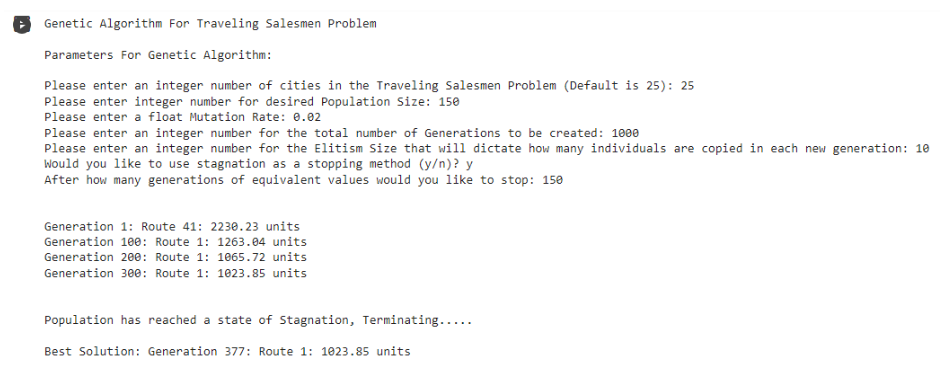
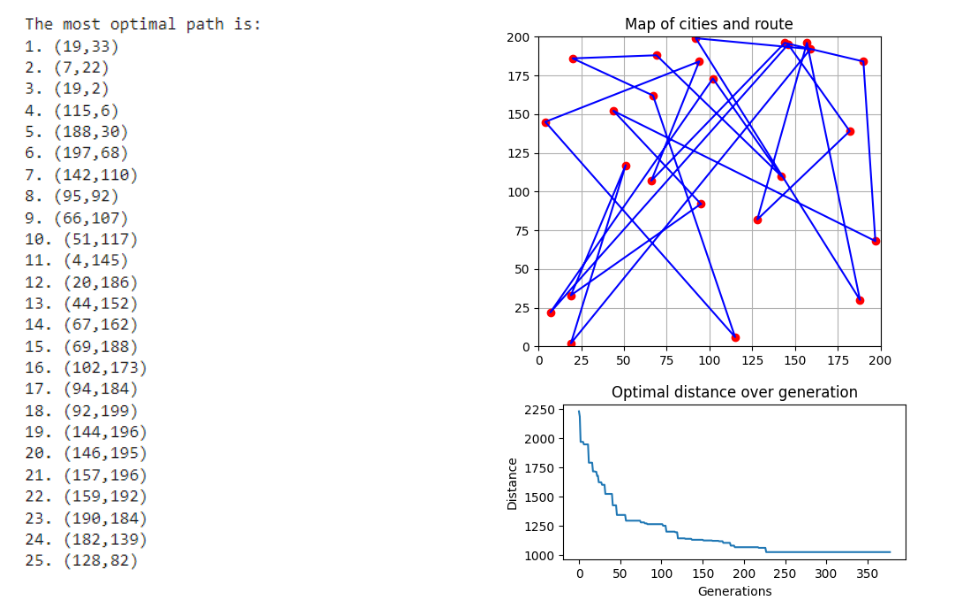

#### Run 2
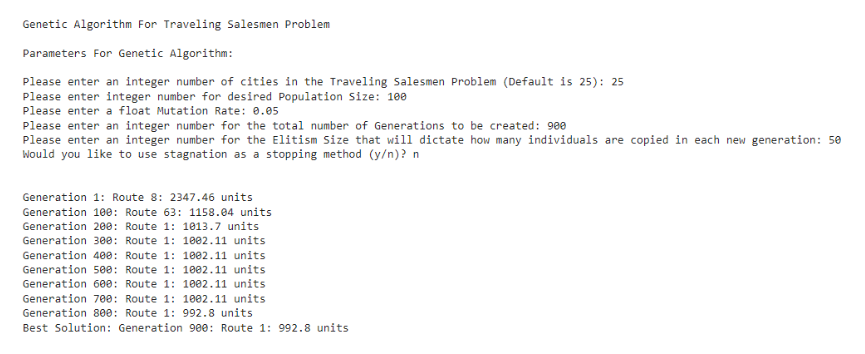
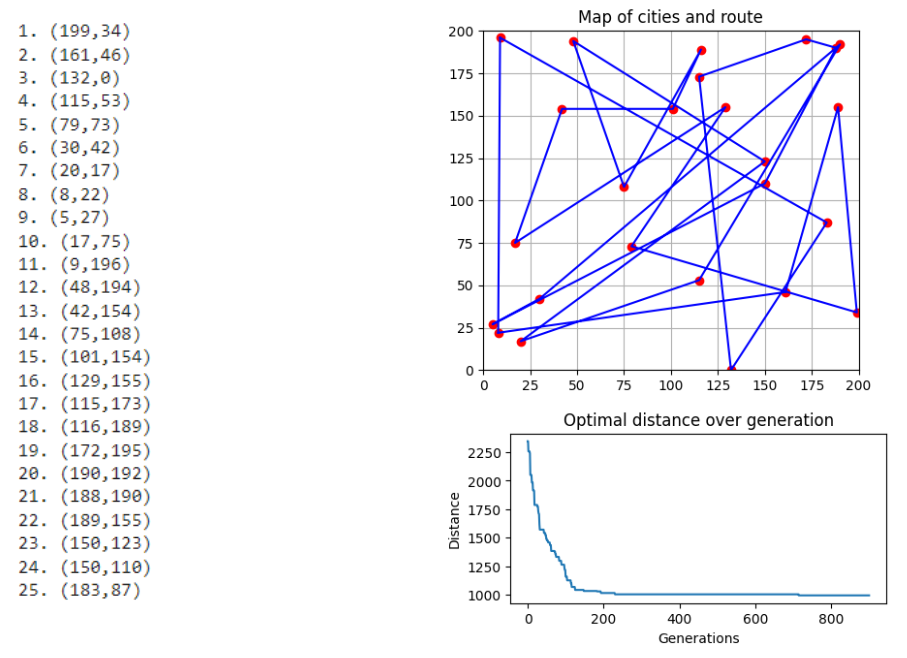

#### Run 3

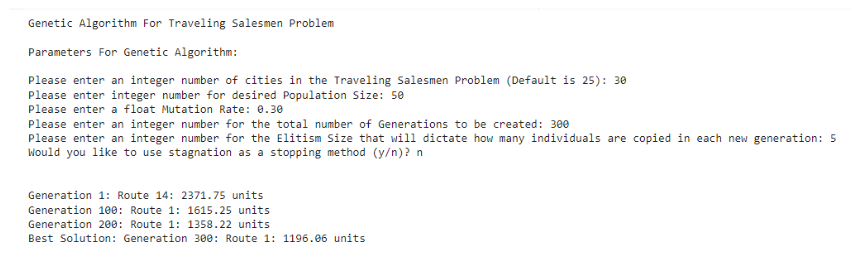

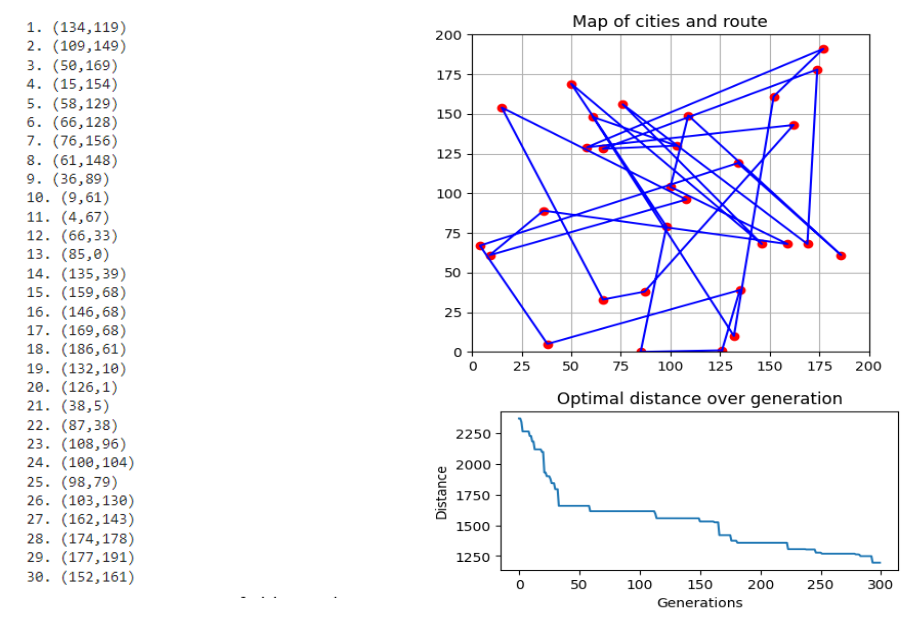

#### Run 4

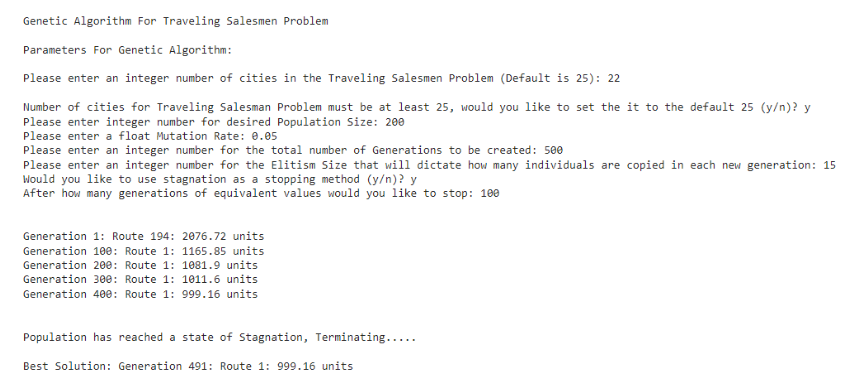

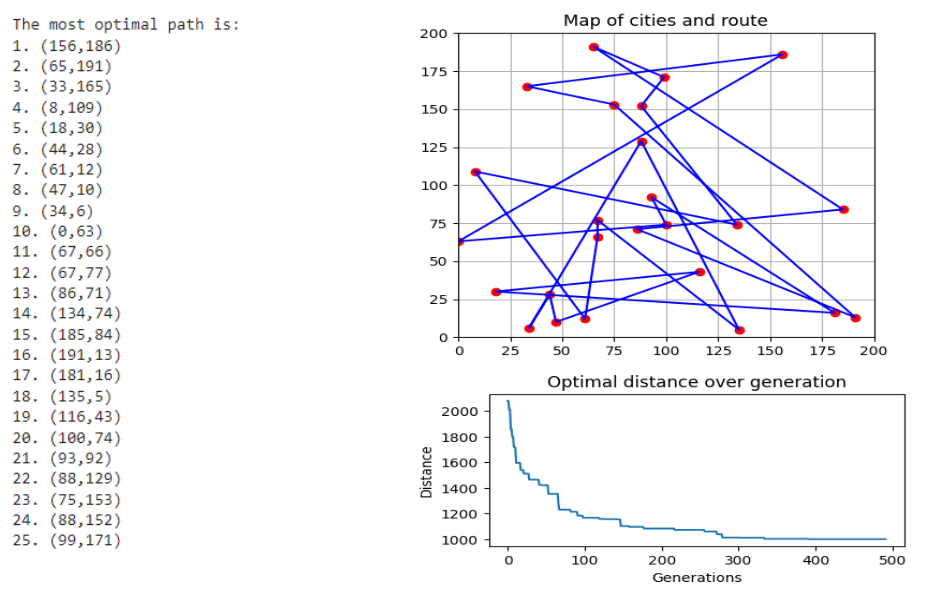

#### Run 5

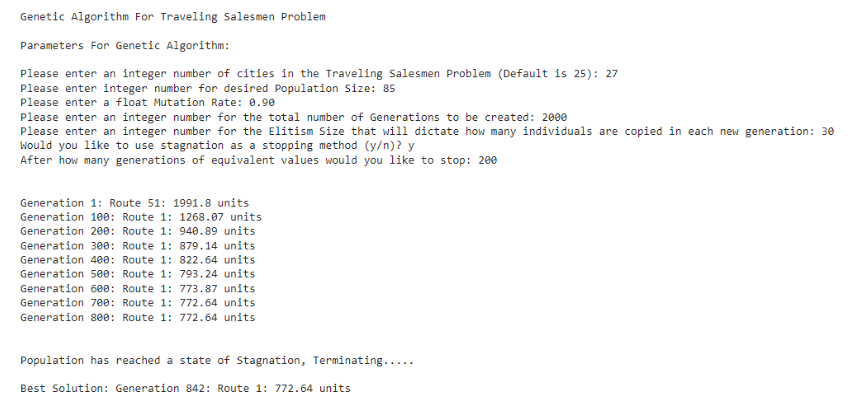

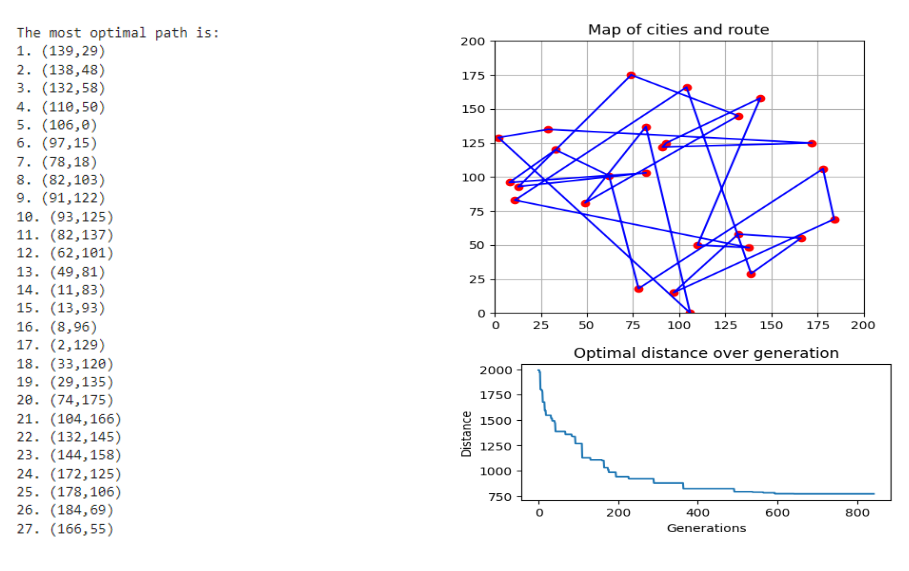

**Resources**

Hurbans, R. (2020). Grokking Artificial Intelligence Algorithms (pp. 91–152). Manning Publications.

Jacobson, Lee. “Applying a Genetic Algorithm to the Traveling Salesman Problem.” The Project Spot, 20 Aug. 2012, www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5. Accessed 30 Sept. 2023.

Stoltz, Eric. “Evolution of a Salesman: A Complete Genetic Algorithm Tutorial for Python.” Medium, Towards Data Science, 18 Mar. 2021, towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35.

The Coding Train. “Coding Challenge #35.4: Traveling Salesperson with Genetic Algorithm.” YouTube, 1 May 2017, https://youtu.be/M3KTWnTrU_c?si=KJBQBBakEllPeKH1. Accessed 30 Sept. 2023.